In [1]:
# %% Imports
import numpy as np
import librosa
import matplotlib.pyplot as plt

import model.signal_to_spectrogram as signal_to_spectrogram

import nn_fac.multilayer_nmf as mlnmf
import nn_fac.deep_nmf as dnmf

from nn_fac.utils.current_plot import plot_me_this_spectrogram, plot_spec_with_annotations

In [2]:
# %% Audio params
sr = 44100
feature = "nn_log_mel"

# %% General params
eps = 1e-12
plotting = True # If you want data to be plotted

# %% Deep NMF params
all_ranks = [32,8]
n_iter = 200
n_iter_deep = n_iter - 100 # 100 iterations for the initialization using multi-layer NMF

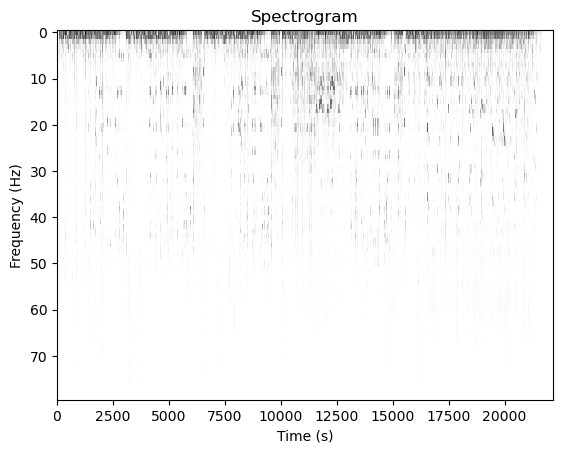

In [3]:
# %% Audio path
audio_path = 'data/Come_Together.wav'

# %% Load audio
signal, _ = librosa.load(audio_path, sr=sr, mono=True)

# Compute the spectrogram
spectrogram = signal_to_spectrogram.get_spectrogram(signal, sr, hop_length=512, feature=feature)

if plotting: # If you want to plot
    plot_me_this_spectrogram(spectrogram, title= "Spectrogram", x_axis = "Time (s)", y_axis = "Frequency (Hz)")


Multi-layer NMF on the Barwise TF Matrix: errors (in KL-divergence): [[ 599573.58472943  488130.55240862  420159.37344509  378377.10532309
   350887.42545358  331447.54671561  316858.64458648  305440.3550904
   296275.07798139  288819.29291578  282706.64375563  277661.19205008
   273461.24256834  269919.50162055  266879.23539803  264224.29773871
   261866.21129853  259737.68751581  257787.63370637  255962.07210121
   254210.63519734  252509.53381735  250845.83819069  249202.65696351
   247583.84749241  245990.63940899  244401.46827952  242815.35687624
   241231.27623468  239642.55477799  238044.33688777  236438.36432705
   234823.32632348  233195.36065523  231557.81831843  229919.94228972
   228285.63645165  226658.55220987  225049.8713608   223467.8069449
   221911.38670506  220376.61688974  218859.24345106  217358.44400416
   215877.57217393  214413.42018717  212958.68824834  211511.1490488
   210075.03958491  208655.56719354  207254.30433562  205869.00165373
   204495.49717119  2031

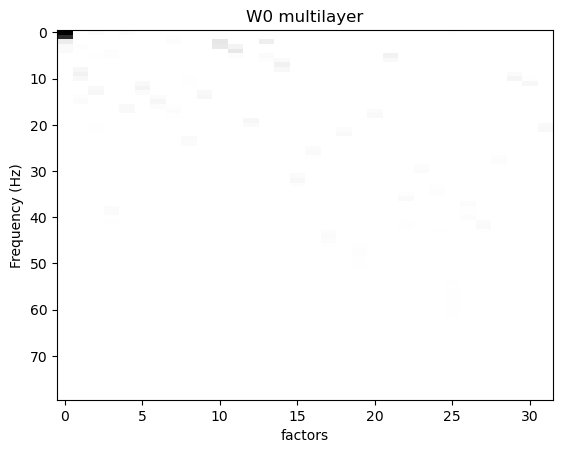

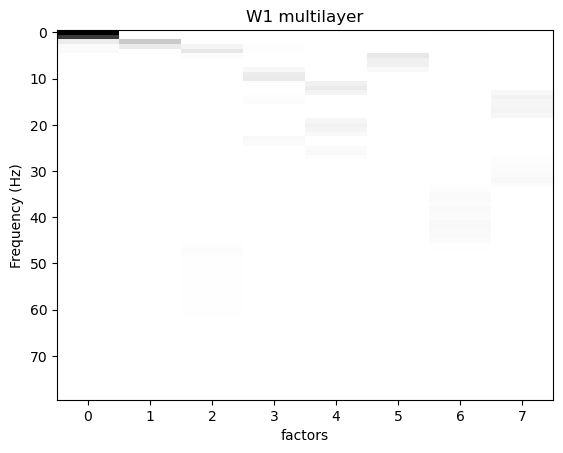

In [4]:
# Call of multi-layer NMF
W_multi, H_multi, errors_multi, toc_multi = mlnmf.multilayer_beta_NMF(spectrogram, all_ranks = all_ranks, beta = 1, n_iter_max_each_nmf = n_iter, norm_type = "h_rows", return_errors = True)
print(f"Multi-layer NMF on the Barwise TF Matrix: errors (in KL-divergence): {errors_multi}, total time of computation: {np.sum(toc_multi)}.")
if plotting: # If you want to plot
    for i in range(len(W_multi)):
        plot_me_this_spectrogram(W_multi[i], title= f"W{i} multilayer", x_axis = "factors", y_axis = "Frequency (Hz)")


Deep NMF on the Barwise TF Matrix: errors (in relative KL-divergence, compared to the init): [[1.54528279e+05 1.04384727e+00 1.05890606e+00 1.06640819e+00
  1.07276800e+00 1.07886989e+00 1.08498230e+00 1.09116650e+00
  1.09730311e+00 1.10315689e+00 1.10845763e+00 1.11298825e+00
  1.11661280e+00 1.11928240e+00 1.12102545e+00 1.12192253e+00
  1.12208059e+00 1.12161744e+00 1.12065170e+00 1.11929554e+00
  1.11765218e+00 1.11581200e+00 1.11384795e+00 1.11181652e+00
  1.10976227e+00 1.10771003e+00 1.10567847e+00 1.10367789e+00
  1.10171090e+00 1.09977684e+00 1.09788167e+00 1.09601969e+00
  1.09418900e+00 1.09238408e+00 1.09060221e+00 1.08884012e+00
  1.08709322e+00 1.08536490e+00 1.08365220e+00 1.08196136e+00
  1.08029298e+00 1.07865125e+00 1.07703554e+00 1.07544494e+00
  1.07387586e+00 1.07232295e+00 1.07078541e+00 1.06926099e+00
  1.06774816e+00 1.06624908e+00 1.06476257e+00 1.06328913e+00
  1.06183314e+00 1.06038609e+00 1.05894832e+00 1.05751356e+00
  1.05607937e+00 1.05464599e+00 1.05321

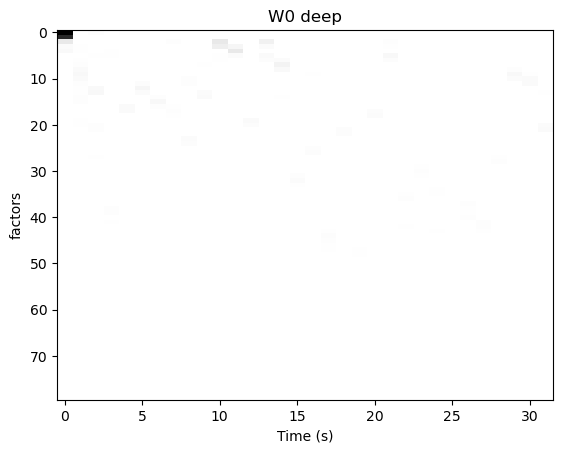

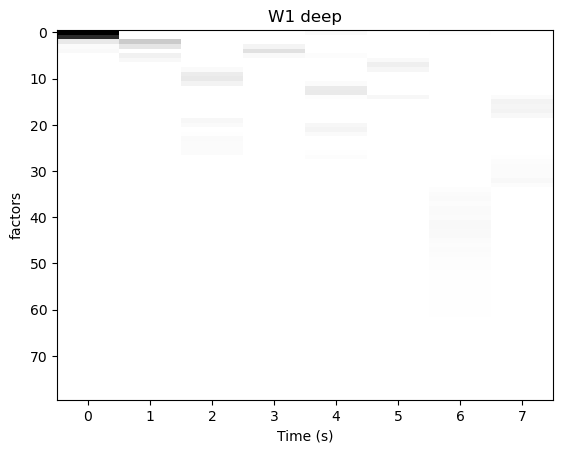

In [5]:
# Call of deep KL NMF
W_deep, H_deep, errors_deep, toc_deep = dnmf.deep_KL_NMF(spectrogram, all_ranks = all_ranks, n_iter_max_each_nmf = 100, n_iter_max_deep_loop = n_iter_deep,return_errors=True)
print(f"Deep NMF on the Barwise TF Matrix: errors (in relative KL-divergence, compared to the init): {errors_deep}, time of computation after the init: {np.sum(toc_deep)}.")
if plotting: # If you want to plot
    for i in range(len(W_deep)):
        plot_me_this_spectrogram(W_deep[i], title= f"W{i} deep", x_axis = "Time (s)", y_axis = "factors")


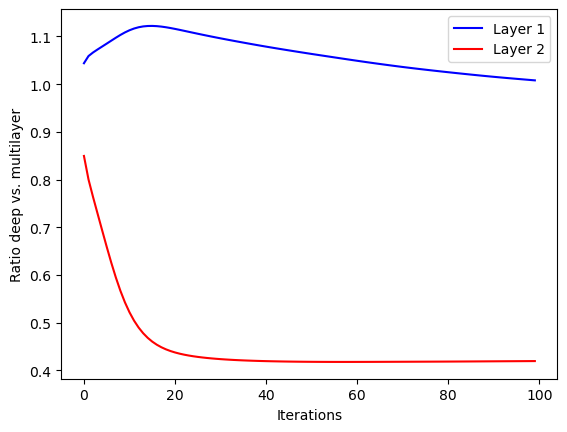

In [6]:
# Evolution of the erros at the different levels of 
# deep β-NMF with β = 1 (initialized with multilayer β-NMF after 100 iterations) 
# divided by the error of multilayer β-NMF after 200 iterations.
plt.figure(1)
plt.plot(errors_deep[0,1:], color='blue', label='Layer 1')
plt.plot(errors_deep[1,1:], color='red', label='Layer 2')
plt.xlabel('Iterations')
plt.ylabel('Ratio deep vs. multilayer')
# plt.title(r'Computation $x^\star$')
plt.legend()
plt.show()

In [7]:
# Check the constraints on H_l
l = 0
print("Layer 1:", np.sum(H_deep[l], axis=1))
l = 1
print("Layer 2:", np.sum(H_deep[l], axis=1))

Layer 1: [1.0000127  1.00000566 0.99998924 1.00001106 0.99998986 1.00000189
 1.00001186 1.0000024  1.00001281 0.99999725 0.99998535 1.00000876
 0.99998257 1.00000792 0.99999943 0.99998855 0.9999873  1.00000322
 1.0000044  1.00001489 0.99998804 1.00001217 0.99999133 0.99999806
 1.00001597 0.99999116 0.99999354 1.00000108 0.99998084 1.00000957
 1.00000317 0.99998659]
Layer 2: [1. 1. 1. 1. 1. 1. 1. 1.]


We test here-under both the multi layer and the deep NMF with SS on the columns of H_l

In [8]:
# %% Deep NMF params
all_ranks = [32,8]
n_iter = 20
n_iter_deep_init = 10
n_iter_deep = n_iter - n_iter_deep_init # 10 iterations for the initialization using multi-layer NMF

Multi-layer NMF on the Barwise TF Matrix: errors (in KL-divergence): [[4474825.85614368 4435722.62248163 4400240.82124005 4368132.02366565
  4339146.44315251 4313025.37789345 4289575.30670311 4268556.42168603
  4249783.15164625 4233026.00030287 4218110.06691863 4204825.32152775
  4193019.15025285 4182506.00192212 4173161.3280889  4164827.8340301
  4157407.86213045 4150774.28133592 4144851.5012948  4139536.85554824]
 [   4746.41785193    4714.88889681    4686.23867524    4660.35435149
     4637.12868658    4616.44143324    4598.14677274    4582.07142812
     4568.02091041    4555.78959456    4545.17110242    4535.96692505
     4527.99245616    4521.08044407    4515.08236386    4509.86826023
     4505.32563665    4501.35783178    4497.88219668    4494.82828908]], total time of computation: 72.62318563461304.


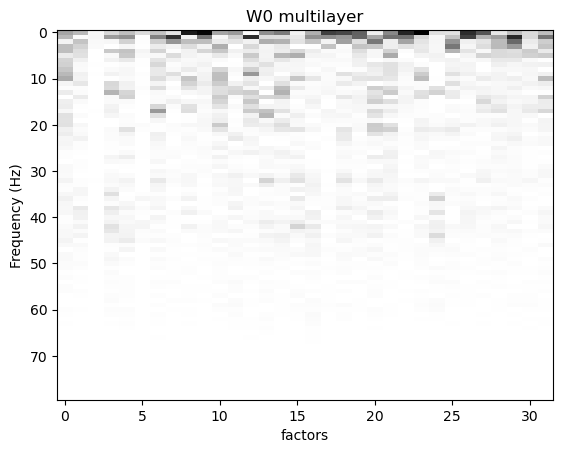

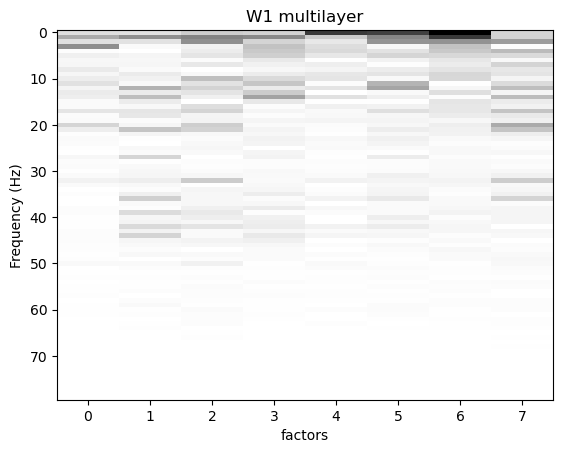

In [9]:
# Call of multi-layer NMF
W_multi, H_multi, errors_multi, toc_multi = mlnmf.multilayer_beta_NMF(spectrogram, all_ranks = all_ranks, beta = 1, n_iter_max_each_nmf = n_iter, norm_type = "h_cols", return_errors = True)
print(f"Multi-layer NMF on the Barwise TF Matrix: errors (in KL-divergence): {errors_multi}, total time of computation: {np.sum(toc_multi)}.")
if plotting: # If you want to plot
    for i in range(len(W_multi)):
        plot_me_this_spectrogram(W_multi[i], title= f"W{i} multilayer", x_axis = "factors", y_axis = "Frequency (Hz)")


In [10]:
# Check the constraints on H_l
l = 0
print("Layer 1:", np.sum(H_multi[l], axis=0))
l = 1
print("Layer 2:", np.sum(H_multi[l], axis=0))

Layer 1: [1.00595226 1.00204853 0.99926795 ... 1.00730111 0.99298791 1.00101919]
Layer 2: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


Deep NMF on the Barwise TF Matrix: errors (in relative KL-divergence, compared to the init): [[4.17648642e+06 2.48402351e-01 2.38144401e-01 2.29101583e-01
  2.21674219e-01 2.15509300e-01 2.10258662e-01 2.05664527e-01
  2.01552107e-01 1.97799277e-01 1.94322677e-01]
 [4.94104780e+03 3.78637290e-02 2.15301186e-02 1.81482901e-02
  1.69253230e-02 1.62110922e-02 1.56799130e-02 1.52530884e-02
  1.49051552e-02 1.46228488e-02 1.43952615e-02]], time of computation after the init: 36.42651128768921.


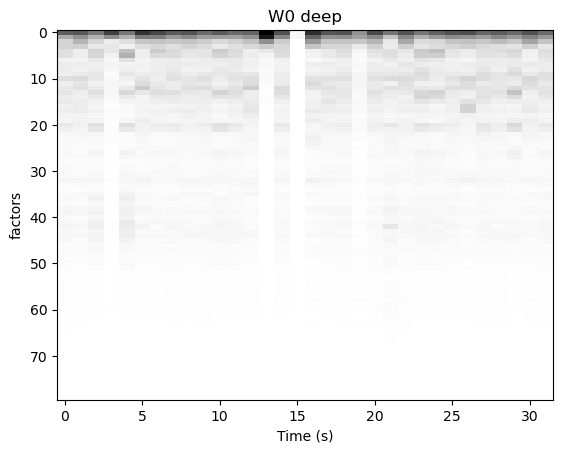

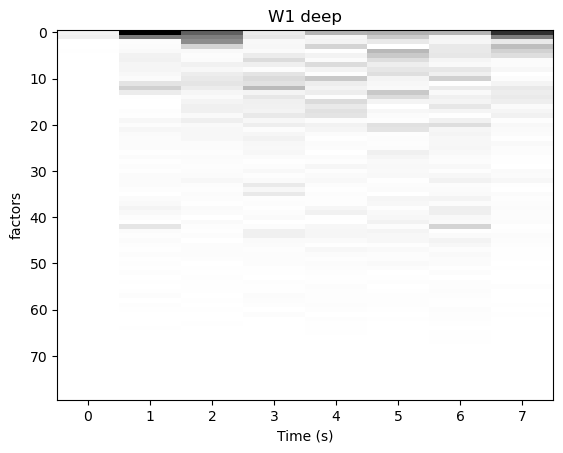

In [12]:
# Call of deep KL NMF
W_deep, H_deep, errors_deep, toc_deep = dnmf.deep_KL_NMF(spectrogram, all_ranks = all_ranks, n_iter_max_each_nmf = n_iter_deep_init, n_iter_max_deep_loop = n_iter_deep, HnormType = 'cols', return_errors=True)
print(f"Deep NMF on the Barwise TF Matrix: errors (in relative KL-divergence, compared to the init): {errors_deep}, time of computation after the init: {np.sum(toc_deep)}.")
if plotting: # If you want to plot
    for i in range(len(W_deep)):
        plot_me_this_spectrogram(W_deep[i], title= f"W{i} deep", x_axis = "Time (s)", y_axis = "factors")


In [13]:
# Check the constraints on H_l
l = 0
print("Layer 1:", np.sum(H_deep[l], axis=0))
l = 1
print("Layer 2:", np.sum(H_deep[l], axis=0))

Layer 1: [1.00528679 0.994557   1.00046106 ... 0.99677357 0.99611539 0.99687143]
Layer 2: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.00000001 1.         1.00000005 1.         1.
 1.         1.00000001 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


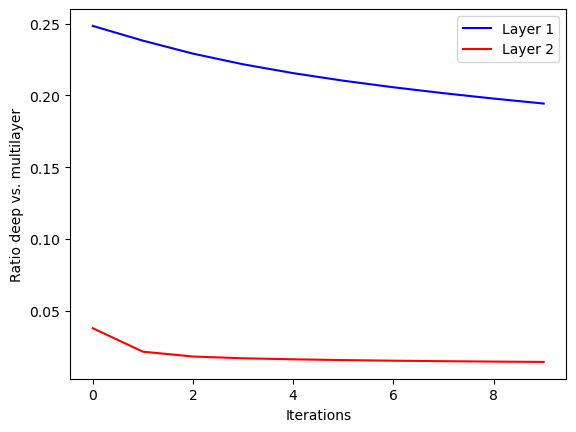

In [16]:
# Evolution of the erros at the different levels of 
# deep β-NMF with β = 1 (initialized with multilayer β-NMF after 100 iterations) 
# divided by the error of multilayer β-NMF after 10 iterations.
plt.figure(1)
plt.plot(errors_deep[0,1:], color='blue', label='Layer 1')
plt.plot(errors_deep[1,1:], color='red', label='Layer 2')
plt.xlabel('Iterations')
plt.ylabel('Ratio deep vs. multilayer')
# plt.title(r'Computation $x^\star$')
plt.legend()
plt.show()